In [1]:
# 서울시 공공데이터포털에서 csv파일을 다운로드 하여 판다스 데이터 프레임으로 만들어 사용할 수 있다.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

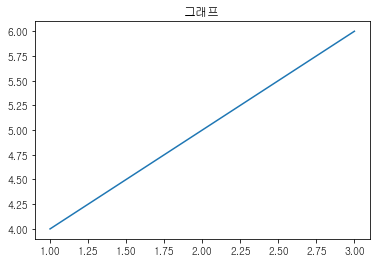

In [4]:
plt.plot([1,2,3],[4,5,6])
plt.title('그래프')
plt.show()

In [3]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'Gulim' # -> 내 컴퓨터의 '굴림'체를 가져옴

In [9]:
# 폰트 확인하기 # 굴림안에 굴림체의 종류별.. 하나를 선택!
[f.name for f in fm.fontManager.ttflist if 'Gulim' in f.name]

['New Gulim', 'Gulim', 'New Gulim', 'Gulim']

In [10]:
df = pd.read_csv('data/서울시 코로나19 확진자 현황2.csv')
# 엑셀파일 열어서 csv, UTF-8로 저장하여 다시 연것.
# 엑셀 버전에 따라 안될 수 있기 때문에 메모장으로 열어 UTF-8(BOM)으로 선택하여 저장
# 엑셀이 없을 경우 구글 스프레드시트로 수정..

C:\Users\Soeng Min\AppData\Local\Temp\ipykernel_3204\2421413899.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/서울시 코로나19 확진자 현황2.csv')


In [11]:
df

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,99550,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
1,99549,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
2,99548,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
3,99547,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
4,99546,2021-09-28,NaN,NaN,NaN,기타,NaN,감염경로 조사중,NaN,-,NaN,2021-09-29 10:54,2021-09-29 10:54,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99545,5,2020-01-31,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99546,4,2020-01-30,NaN,NaN,NaN,마포구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99547,3,2020-01-30,NaN,NaN,NaN,종로구,NaN,종로구 집단발병,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y
99548,2,2020-01-30,NaN,NaN,NaN,중랑구,중국,해외유입,NaN,퇴원,NaN,2021-05-27 11:08,2021-05-27 11:08,Y


# 데이터 확인 및 전처리

In [16]:
df['환자번호'].unique()
df['국적'].unique()
df['환자정보'].unique() 
df['이동경로'].unique() 
df['조치사항'].unique() # 모두 널

array([nan])

## 불필요한 컬럼 삭제

In [20]:
df.drop(columns = ['환자번호','국적','환자정보','이동경로','등록일','수정일','노출여부','조치사항'], inplace=True)
# 미리보기한것.. inplace=True 해줘야한다.

In [21]:
df

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-
...,...,...,...,...,...,...
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원
99546,4,2020-01-30,마포구,중국,해외유입,퇴원
99547,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원
99548,2,2020-01-30,중랑구,중국,해외유입,퇴원


# 자료형 변환

In [22]:
# 자료형 확인
df.dtypes # object는 str형

연번      int64
확진일    object
지역     object
여행력    object
접촉력    object
상태     object
dtype: object

In [25]:
# 확진일 --> datetime
df['확진일'] = pd.to_datetime(df['확진일']) # 에러가 나는 경우엔 데이터 처리를 해줘야한다.
df.dtypes

연번              int64
확진일    datetime64[ns]
지역             object
여행력            object
접촉력            object
상태             object
dtype: object

In [26]:
# 지역의 공백 제거
df['지역'].nunique()

29

In [27]:
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구',
       '타시도 ', ' 성북구'], dtype=object)

In [29]:
df['지역'] = df['지역'].str.strip() # strip()함수는 공백을 제거한다.

In [30]:
df['지역'].nunique()

27

In [31]:
df['지역'].unique()

array(['기타', '영등포구', '관악구', '서대문구', '송파구', '동대문구', '성동구', '중랑구', '타시도',
       '종로구', '도봉구', '용산구', '마포구', '구로구', '동작구', '강동구', '중구', '노원구',
       '양천구', '강서구', '은평구', '성북구', '광진구', '금천구', '강북구', '강남구', '서초구'],
      dtype=object)

In [33]:
# 지역, 상태 --> category형 변환 (지역의 공백 제거)
df['지역'] = df['지역'].astype('category')
# 카테고리형 타입을 다시 문자열 함수를 적용하게되면 문자로 인식하게된다..object
# 카테고리형 -> 데이터의 메모리측에서 좋고, 데이터 관리에서도 좋다..

In [34]:
df.dtypes

연번              int64
확진일    datetime64[ns]
지역           category
여행력            object
접촉력            object
상태             object
dtype: object

In [35]:
# 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99550 entries, 0 to 99549
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      99550 non-null  int64         
 1   확진일     99550 non-null  datetime64[ns]
 2   지역      99550 non-null  category      
 3   여행력     1717 non-null   object        
 4   접촉력     99550 non-null  object        
 5   상태      99550 non-null  object        
dtypes: category(1), datetime64[ns](1), int64(1), object(3)
memory usage: 3.9+ MB


# 결측치 분석

In [36]:
df.isnull().sum()

연번         0
확진일        0
지역         0
여행력    97833
접촉력        0
상태         0
dtype: int64

In [37]:
df

,연번,확진일,지역,여행력,접촉력,상태
0,99550,2021-09-28,기타,NaN,감염경로 조사중,-
1,99549,2021-09-28,기타,NaN,감염경로 조사중,-
2,99548,2021-09-28,기타,NaN,감염경로 조사중,-
3,99547,2021-09-28,기타,NaN,감염경로 조사중,-
4,99546,2021-09-28,기타,NaN,감염경로 조사중,-
...,...,...,...,...,...,...
99545,5,2020-01-31,성북구,NaN,기타 확진자 접촉,퇴원
99546,4,2020-01-30,마포구,중국,해외유입,퇴원
99547,3,2020-01-30,종로구,NaN,종로구 집단발병,퇴원
99548,2,2020-01-30,중랑구,중국,해외유입,퇴원


In [ ]:
# 서울시 코로나 확인 분석을 위한 데이터 처리완료..